In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# edits 

In [3]:
revisions = pd.read_csv('../dataset/enwiki/revisions.csv', usecols=["page_id","page_title","contributor","timestamp"])
revisions.shape

(185, 4)

In [4]:
revisions['creation_dt'] = pd.to_datetime(revisions['timestamp'], unit='s')
revisions['creation_date'] = revisions.creation_dt.dt.date

In [5]:
revisions.groupby('page_title').size()

page_title
Talk:Rafael Correa    185
dtype: int64

In [8]:
article = revisions[revisions.page_title=='Talk:Rafael Correa']
epp = article.groupby('creation_date').size()
epp.head()

creation_date
2006-09-29    1
2006-10-06    3
2006-10-07    6
2006-10-08    1
2006-10-16    3
dtype: int64

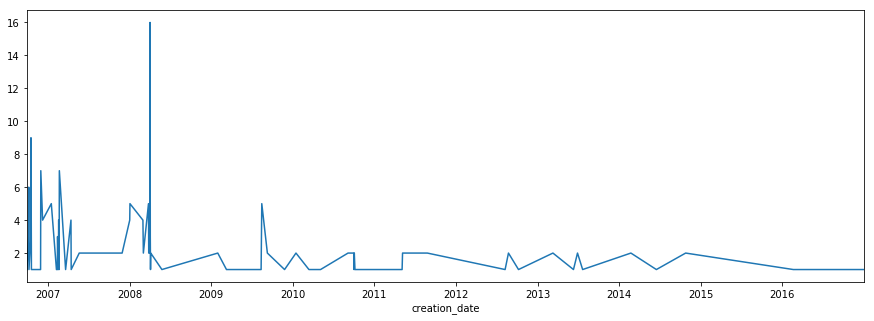

In [9]:
plt.figure(figsize=(15,5))
epp.plot.line()

# discussions

In [10]:
discussions = revisions[revisions.page_title=='Talk:Rafael Correa']
discussions.shape

(185, 6)

In [11]:
dpp = discussions.groupby('creation_date').size()
dpp.head()

creation_date
2006-09-29    1
2006-10-06    3
2006-10-07    6
2006-10-08    1
2006-10-16    3
dtype: int64

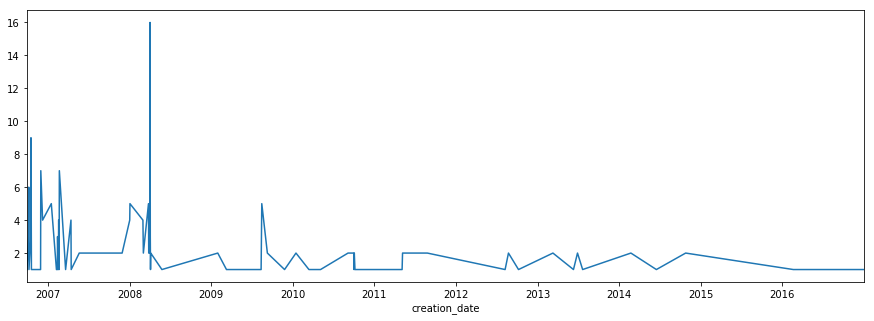

In [12]:
plt.figure(figsize=(15,5))
dpp.plot.line()

# sentiments in discussions

In [13]:
ds_sent = pd.read_csv('../dataset/enwiki/sentiments.csv')
ds_sent.shape

(1948, 10)

In [18]:
ds_sent.page_title.unique()

array(['Talk:Rafael Correa'], dtype=object)

In [19]:
ds_sent['creation_dt'] = pd.to_datetime(ds_sent['timestamp'])

In [20]:
page = 'Talk:Rafael Correa'

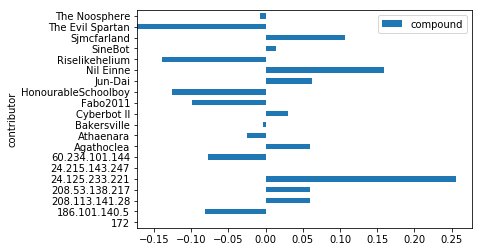

In [21]:
page_sent = ds_sent[ds_sent.page_title==page]
top_contrib = page_sent.groupby('contributor').size().sort_values(ascending=False).head(20)
article_sent = page_sent[page_sent.contributor.isin(top_contrib.index)]
users_sent = article_sent.groupby(by=['contributor']).agg({'compound':'mean'})
users_sent.plot(kind='barh')#, figsize=(5,10))

In [22]:
time_sent = page_sent.groupby('creation_dt').agg({'compound':'mean'})
time_sent.head()

,compound
creation_dt,
2006-10-06 12:18:42,0.102967
2006-10-06 16:42:01,0.011575
2006-10-06 16:44:44,0.017975
2006-10-07 03:03:22,0.051600
2006-10-07 03:05:19,0.109533


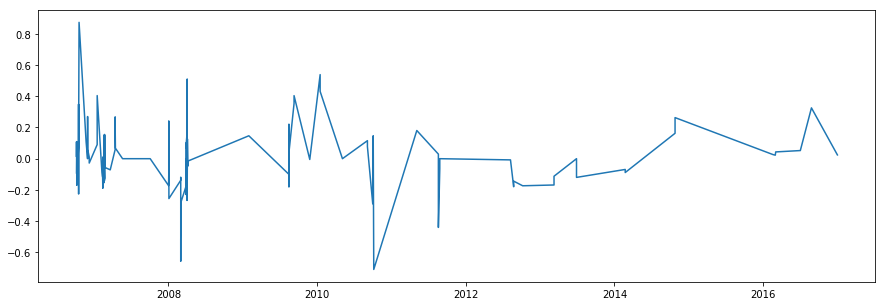

In [23]:
#plt.clf()
plt.figure(figsize=(15,5))
#sentiment.plot.line()
plt.plot(time_sent)